In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import sklearn.metrics as metrics

warnings.filterwarnings('ignore')

# Data load and pre-processing


In [2]:
min_max_scaler = preprocessing.MinMaxScaler()

#################
# load Penrose data
#################
path = "/mnt/c/Users/T828808/Study/AUT/COMP809/Ass2/Penrose_Hourly_AggregateData_Jan2016Dec2020.csv"
rawdata = pd.read_csv(path)

# Rearrange Timestamp column
# Remove incorrect values or outliers
rawdata = rawdata[rawdata['Relative Humidity (%)'] <= 100]
rawdata = rawdata[rawdata['Air Temp (�C)'] <= 40]
rawdata = rawdata.dropna(how='any',axis=0)
rawdata['Timestamp (UTC+12:00)'] = pd.to_datetime(rawdata['Timestamp (UTC+12:00)'])
rawdata = rawdata.set_index('Timestamp (UTC+12:00)')
rawdata['Hour'] = rawdata.index.hour
rawdata['Day'] = rawdata.index.day
rawdata['Month'] = rawdata.index.month
rawdata['Year'] = rawdata.index.year

# categorise everything and create array
list_of_columns = rawdata.columns
rawdata[list_of_columns] = rawdata[list_of_columns].apply(lambda col:pd.Categorical(col).codes)

# Inspecting outliers

==================================== SO2 (�g/m�) ====================================
Slope: 1.011
Intercept: 106.215
explained_variance:  0.1236
r2:  0.1236
MAE:  36.4505
MSE:  2458.9511
RMSE:  49.5878
Pearsons correlation:  0.3515


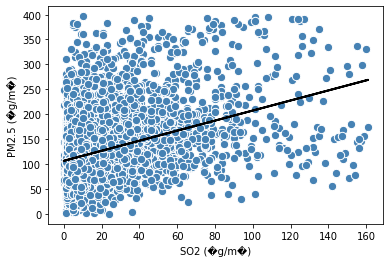

==================================== NO2 (�g/m�) ====================================
Slope: 0.128
Intercept: 98.190
explained_variance:  0.1137
r2:  0.1137
MAE:  36.438
MSE:  2486.5994
RMSE:  49.8658
Pearsons correlation:  0.3372


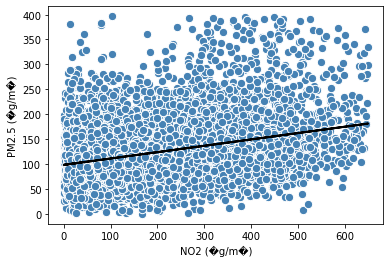

==================================== NO (�g/m�) ====================================
Slope: 0.113
Intercept: 103.757
explained_variance:  0.1904
r2:  0.1904
MAE:  35.2568
MSE:  2271.5162
RMSE:  47.6604
Pearsons correlation:  0.4363


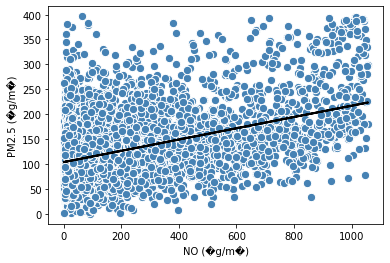

==================================== Wind Speed (m/s) ====================================
Slope: -0.233
Intercept: 127.722
explained_variance:  0.0045
r2:  0.0045
MAE:  38.6166
MSE:  2792.8766
RMSE:  52.8477
Pearsons correlation:  -0.0673


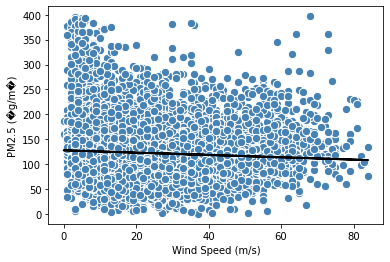

==================================== Wind Direction (�) ====================================
Slope: 0.085
Intercept: 106.028
explained_variance:  0.0211
r2:  0.0211
MAE:  38.016
MSE:  2746.4533
RMSE:  52.4066
Pearsons correlation:  0.1452


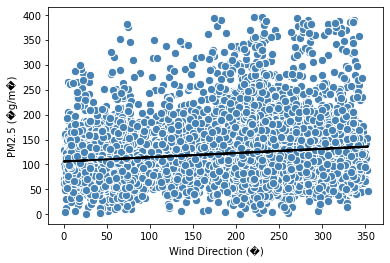

==================================== Solar Radiation (W/m�) ====================================
Slope: 0.001
Intercept: 121.037
explained_variance:  0.0004
r2:  0.0004
MAE:  38.47
MSE:  2804.466
RMSE:  52.9572
Pearsons correlation:  0.02


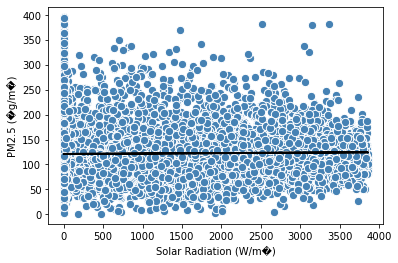

==================================== Relative Humidity (%) ====================================
Slope: -0.003
Intercept: 123.050
explained_variance:  0.0001
r2:  0.0001
MAE:  38.4961
MSE:  2805.3804
RMSE:  52.9658
Pearsons correlation:  -0.0086


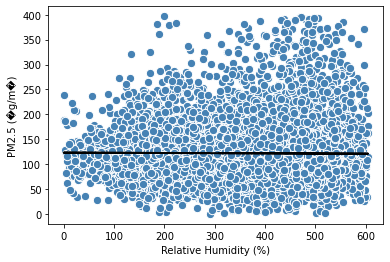

==================================== Air Temp (�C) ====================================
Slope: -3.581
Intercept: 172.655
explained_variance:  0.0722
r2:  0.0722
MAE:  37.9256
MSE:  2603.0704
RMSE:  51.0203
Pearsons correlation:  -0.2687


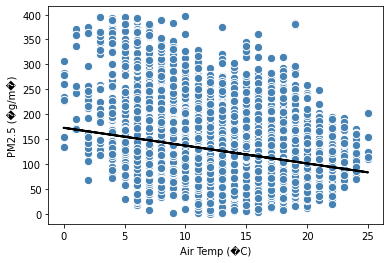

==================================== Hour ====================================
Slope: -0.318
Intercept: 125.667
explained_variance:  0.0017
r2:  0.0017
MAE:  38.4984
MSE:  2800.7835
RMSE:  52.9224
Pearsons correlation:  -0.0414


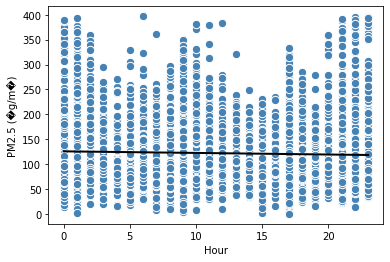

In [3]:
# A function that will plot a scatterplot of the training samples and add the regression line
def lin_reg_plot(x_name):
    
    # Create the model
    slr = LinearRegression()
    slr.fit(X, y)
    
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y, slr.predict(X))
    mean_absolute_error=metrics.mean_absolute_error(y, slr.predict(X)) 
    mse=metrics.mean_squared_error(y, slr.predict(X)) 
    median_absolute_error=metrics.median_absolute_error(y, slr.predict(X))
    r2=metrics.r2_score(y, slr.predict(X))
    corr, _ = pearsonr(rawdata[x_name], y)

    # Print stats
    print('==================================== ' + x_name + ' ====================================')
    print('Slope: %.3f' % slr.coef_[0])
    print('Intercept: %.3f' % slr.intercept_)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Pearsons correlation: ', round(corr,4)) # Over 0.5 or less than -0.5 signifies strongest correlation
    
    # Chart
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, slr.predict(X), color='black', lw=2)
    plt.xlabel(x_name)
    plt.ylabel('PM2.5 (�g/m�)')
    plt.show()

# Starting point X and y
X = rawdata[['Hour','Air Temp (�C)','Relative Humidity (%)','Solar Radiation (W/m�)','Wind Direction (�)','Wind Speed (m/s)','NO (�g/m�)','NO2 (�g/m�)','SO2 (�g/m�)']].values
y = rawdata['PM2.5 (�g/m�)'].values

# Display data in 2D
x_name = 'SO2 (�g/m�)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'NO2 (�g/m�)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'NO (�g/m�)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'Wind Speed (m/s)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'Wind Direction (�)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'Solar Radiation (W/m�)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'Relative Humidity (%)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'Air Temp (�C)'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)
x_name = 'Hour'
X = rawdata[[x_name]].values
lin_reg_plot(x_name)

# Feature importance

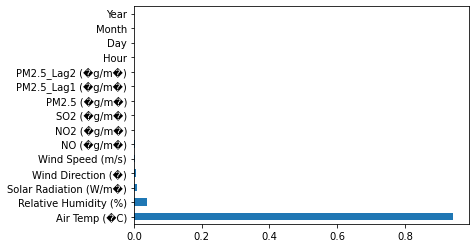

In [4]:
# Run PCA
pca = PCA()
pca_fit = pca.fit(rawdata)
# summarize components
feat_importances = pd.Series(pca_fit.explained_variance_ratio_, index=rawdata.columns)
feat_importances.nlargest(20).plot(kind='barh')
# Get only the first two components as they explain almost all of the variance
pca = PCA(n_components=2)
pca_fit = pca.fit(rawdata)

# Summary stats for PM2.5 (�g/m�)

In [5]:
rawdata['PM2.5 (�g/m�)'].describe() 

count    10313.000000
mean       121.846310
std         52.970365
min          0.000000
25%         88.000000
50%        113.000000
75%        145.000000
max        397.000000
Name: PM2.5 (�g/m�), dtype: float64

# Do the train/test split

In [9]:
# Get final X and y - we want to keep the top five attributes based on Pearsons correlation
# Five topmost correlated varaiables are 'Air Temp (�C)','Wind Direction (�)','NO (�g/m�)','NO2 (�g/m�)','SO2 (�g/m�)'
X = rawdata[['Air Temp (�C)','Wind Direction (�)','NO (�g/m�)','NO2 (�g/m�)','SO2 (�g/m�)']].values
y = rawdata['PM2.5 (�g/m�)'].values

# We need to reduce the number of categories for y - max is 397, we can probably start with 7 categories
# In this case we get about 0.45 accuracy score
# If we reduce the categories to 4, we get about 0.6 accuracy score
y = np.digitize(y,bins=[50,100,150,200,250,300,350])

# Do the train/test split
pred_train, pred_test, tar_train, tar_test = train_test_split(X, y, test_size=.3, random_state=4)

# MLP classifier

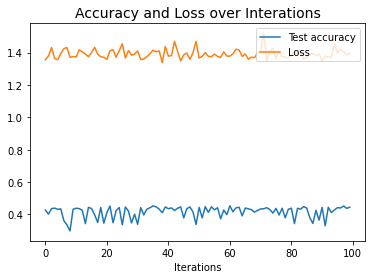

Loss 1.4461270468227754
iterations 78
Assigned classes [0 1 2 3 4 5 6 7]


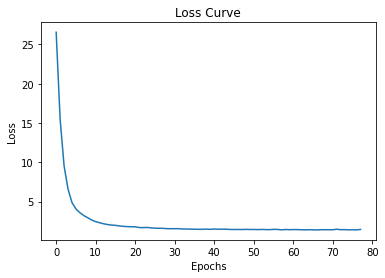

Accuracy score: 0.44


In [10]:
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

#A function to see some of the attributes of NN
def NN_properties(model):
    loss_values = model.loss_
    print("Loss", loss_values)
    iterations = model.n_iter_
    print("iterations",iterations)
    classes_assigned= model.classes_
    print("Assigned classes", classes_assigned)
    
#Displaying loss curve using loss_curve method.Note that this only works with the MLP default solver “adam”
def make_plots_default(model):
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
#A generic function to display training loss and testing accuracy of MLPClassifier
def make_plots_all(mlp, target_train, target_test, predictors_test,predictors_train):
    max_iter = 100
    accuracy = []
    losses = []
    for i in range(max_iter):
        mlp.fit(predictors_train, target_train)
        iter_acc = mlp.score(predictors_test, target_test)
        accuracy.append(iter_acc)
        losses.append(mlp.loss_)
    plt.plot(accuracy, label='Test accuracy')
    plt.plot(losses, label='Loss')
    plt.title("Accuracy and Loss over Interations", fontsize=14)
    plt.xlabel('Iterations')
    plt.legend(loc='upper right')
    plt.show()
        
#A function for model building and calculating accuracy
def get_accuracy(target_train, target_test, predictors_test, predictors_train):
    # Two hidden layers with 10 and 5 neurons - NN
    clf = MLPClassifier(hidden_layer_sizes=(25), max_iter=100)
    #Calling the make_plots_allfunction with unfitted model
    make_plots_all(clf, target_train, target_test, predictors_test, predictors_train)
    clf.fit(predictors_train, np.ravel(target_train, order='C'))
    predictions = clf.predict(predictors_test)
    NN_properties(clf) ##Calling NN_properties to see the model attributes
    make_plots_default(clf) ##Calling make_plots function to see the error plots
    return accuracy_score(target_test, predictions)

#train-test split
pred_train, pred_test, tar_train, tar_test = train_test_split(X, y, test_size=.3, random_state=4)

#Calling get_accuracy function which also invoke other functions NN_properties, make_plots, make_plots_all
print("Accuracy score: %.2f" % get_accuracy(tar_train, tar_test, pred_test, pred_train))


# 2-Layer MLP

In [11]:
#train-test split
pred_train, pred_test, tar_train, tar_test = train_test_split(X, y, test_size=.3, random_state=4)

def two_layer_mlp(num_l1):
    tlmlp = MLPClassifier(hidden_layer_sizes=(num_l1, 25-num_l1,), max_iter=84)
    fit_tlmlp = tlmlp.fit(pred_train, np.ravel(tar_train, order='C'))
    pred_tlmlp = tlmlp.predict(pred_test)
    prob_tlmlp = tlmlp.predict_proba(pred_test)
    accuracy_tlmlp = accuracy_score(tar_test, pred_tlmlp)
    return accuracy_tlmlp

results = pd.DataFrame(columns=["Combination of neurons", "Accuracy"])
for i in range(1,25):    
    new_row = {"Combination of neurons": str(i)+","+str(25-i), "Accuracy": str(two_layer_mlp(i))}
    results = results.append(new_row, ignore_index=True)

# Drop results out to a table
results

,Combination of neurons,Accuracy
0,"1,24",0.43956043956043955
1,"2,23",0.38978668390433097
2,"3,22",0.4188752424046542
3,"4,21",0.41047188106011634
4,"5,20",0.3784744667097608
5,"6,19",0.4460245636716225
6,"7,18",0.43956043956043955
7,"8,17",0.4253393665158371
8,"9,16",0.4414996767937944
9,"10,15",0.4411764705882353
